In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltå

In [2]:
df = pd.read_csv("../data/oh_merged_general.csv")
# remove Unamed: 0
# df.drop("Unnamed: 0")

/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_9884/2420093466.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/oh_merged_general.csv")


In [3]:
# df = df.drop("Unnamed: 0", axis=1)

In [4]:
# save
# df.to_csv("../data/oh_merged.csv")


In [5]:
# show head without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,LALVOTERID,Residence_Addresses_CensusBlock,Residence_Families_FamilyID,Residence_Addresses_Property_Land_Square_Footage,Residence_Addresses_Property_Type,Mailing_Addresses_State,Mailing_Addresses_Zip,Voters_Gender,Voters_Age,Voters_BirthDate,ConsumerData_Education_of_Person,EthnicGroups_EthnicGroup1Desc,ConsumerData_Inferred_HH_Rank,ConsumerData_Language_Code,ConsumerData_Marital_Status,ConsumerData_Single_Parent,ConsumerDataLL_Veteran,ConsumerData_African_American_Professional,ConsumerData_Business_Owner,ConsumerData_Occupation_Group,ConsumerData_Occupation_of_Person,ConsumerData_LikelyRecentEmployment_Executive_Level,ConsumerData_LikelyRecentEmployment_Executive_Department,Voters_PlaceOfBirth,Voters_Active,Voters_CalculatedRegDate,Voters_OfficialRegDate,Parties_Description,VoterParties_Change_Changed_Party,ConsumerData_Religion_Code,ConsumerData_Number_Of_Adults_in_HH,ConsumerData_Number_Of_Children_in_HH,ConsumerData_Number_Of_Persons_in_HH,ConsumerData_Disabled_In_HH,ConsumerData_Generations_In_HH,ConsumerData_Presence_Of_Children_in_HH,ConsumerData_Senior_Adult_In_HH,ConsumerData_Veteran_In_HH,ConsumerData_Young_Adult_In_HH,ConsumerData_Assimilation_Status,Residence_HHParties_Description,Residence_Families_HHVotersCount,County,Voters_FIPS,ConsumerData_RUS_Code,Residence_Addresses_Density,ConsumerData_AreaPcntHHWithChildren,ConsumerData_AreaPcntHHMarriedCoupleWithChild,ConsumerData_AreaPcntHHMarriedCoupleNoChild,ConsumerData_AreaPcntHHSpanishSpeaking,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,ConsumerData_Home_Purchase_Year,ConsumerData_Home_Purchase_Date,ConsumerData_Home_Est_Current_Value_Code,ConsumerData_TaxAssessedValueTotal,ConsumerData_Home_Mortgage_Amount,ConsumerData_Home_Mortgage_Amount_Code,ConsumerData_Home_Purchase_Price,ConsumerData_Home_Purchase_Price_Code,ConsumerData_TaxMarketValueTotal,ConsumerData_Dwelling_Type,ConsumerData_AccessibilityHandicapFlag,Residence_Addresses_Property_Home_Square_Footage,ConsumerData_Homeowner_Probability_Model,ConsumerData_BedroomsCount,ConsumerData_RoomsCount,ConsumerData_CRA_Income_Classification_Code,ConsumerData_Credit_Rating,ConsumerData_Estimated_Income_Amount,ConsumerData_Household_Net_Worth,ConsumerData_AreaMedianHousingValue,ConsumerData_EstimatedAreaMedianHHIncome,ConsumerData_AreaMedianEducationYears,ConsumerData_Likely_Income_Ranking_by_Area,ConsumerData_Likely_Educational_Attainment_Ranking_by_Area,ConsumerData_Social_Ranking_Index_by_Area,ConsumerData_MAID_Available,General_2000_11_07,General_2004_11_02,General_2008_11_04,General_2012_11_06,General_2016_11_08,General_2020_11_03
0,0,LALOH483988945,2034.0,R021844817,13000.0,Apartment,MA,2119.0,M,27.0,1997-05-06,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2016-02-14,2020-02-12,Democratic,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,Democratic,1,FAYETTE,47,Rural,6277.0,38%,38%,63%,0%,NaN,NaN,NaN,NaN,NaN,"$200,000 - $224,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,700.0,Renter,NaN,NaN,NaN,NaN,$86944,NaN,$216300,$86944,13.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,Y,Y
1,1,LALOH539415345,3006.0,R015691344,14000.0,Apartment,MA,2135.0,M,24.0,2000-05-30,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2020-09-21,2020-09-21,Non-Partisan,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,Y,NaN,Independent,1,CUYAHOGA,35,Suburban,1797.0,41%,37%,32%,0%,NaN,NaN,NaN,NaN,NaN,"$300,000 - $349,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,6300.0,Renter,NaN,NaN,NaN,NaN,$130227,NaN,$335100,$130227,15.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,2,LALOH309002,1026.0,R000431800,56000.0,Residential,ME,3904.0,M,40.0,1984-04-04,NaN,European,2.0,English,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2002-04-07,2018-09-24,Republican,NaN,NaN,2,NaN,2,NaN,1,NaN,NaN,NaN,NaN,NaN,Republican,1,COLUMBIANA,29,Rural,10.0,18%,18%,0%,0%,NaN,NaN,NaN,NaN,NaN,"$150,000 - $174,999",NaN,NaN,NaN,NaN,NaN,NaN,Single Family Dwelling Unit,NaN,4300.0,NaN,NaN,NaN,NaN,N

In [6]:
# total rows
total_rows = df.shape[0]
print(f"Originally there are {total_rows} rows")

Originally there are 7760253 rows


In [7]:
presidential_cols = [i for i in df.columns if i.startswith("General_")]
print(presidential_cols)

vote_dates = ["-".join(i.split("_")[1:]) for i in presidential_cols]
print(vote_dates)

['General_2000_11_07', 'General_2004_11_02', 'General_2008_11_04', 'General_2012_11_06', 'General_2016_11_08', 'General_2020_11_03']
['2000-11-07', '2004-11-02', '2008-11-04', '2012-11-06', '2016-11-08', '2020-11-03']


In [8]:
df_with_votability = df.copy()
# add each column based on whether the vote date is possible
new_columns = []
for i in vote_dates:
    register_date = df["Voters_CalculatedRegDate"]
    new_col = "can_vote_" + i
    new_columns.append(new_col)
    df[new_col] = register_date <= i

In [9]:
df[new_columns].sum(axis=0)

can_vote_2000-11-07    2695966
can_vote_2004-11-02    3745080
can_vote_2008-11-04    4488990
can_vote_2012-11-06    5086923
can_vote_2016-11-08    5828172
can_vote_2020-11-03    6783876
dtype: int64

In [10]:
voted = {
    "date": [],
    "rate": [],
    "count": [],
    "noshow_count": []
}

for pres_col in presidential_cols:
    name = pres_col.replace("_", "-")
    date = "-".join(name.split("-")[1:])
    print(name, date)
    can_vote_sum = df["can_vote_" + date].sum()
    voted_sum = (df[pres_col] == "Y").sum()
    participation = voted_sum / can_vote_sum
    print(participation)
    voted["date"].append(date)
    voted["rate"].append(participation)
    voted["count"].append(voted_sum)
    voted["noshow_count"].append(can_vote_sum - voted_sum)

General-2000-11-07 2000-11-07
0.8881936938373852
General-2004-11-02 2004-11-02
0.9205402821835582
General-2008-11-04 2008-11-04
0.8704325471876747
General-2012-11-06 2012-11-06
0.8281287135661382
General-2016-11-08 2016-11-08
0.8037921667377009
General-2020-11-03 2020-11-03
0.8045925367739623


In [11]:
voted["rate"]

[np.float64(0.8881936938373852),
 np.float64(0.9205402821835582),
 np.float64(0.8704325471876747),
 np.float64(0.8281287135661382),
 np.float64(0.8037921667377009),
 np.float64(0.8045925367739623)]

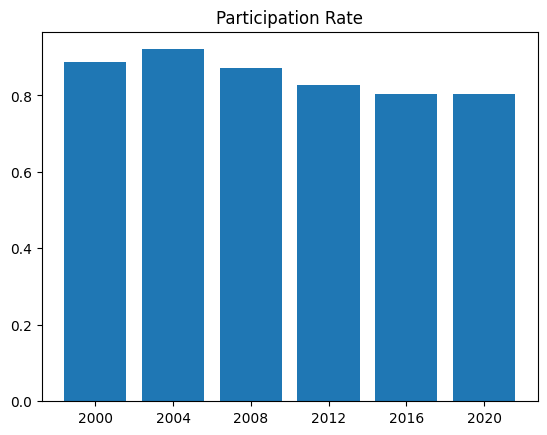

In [12]:
# plot
import matplotlib.pyplot as plt

plt.bar([i.split("-")[0] for i in voted["date"]], voted["rate"])
plt.title("Participation Rate")
plt.show()

In [13]:
voted["noshow_count"]

[np.int64(301426),
 np.int64(297583),
 np.int64(581627),
 np.int64(874296),
 np.int64(1143533),
 np.int64(1325620)]

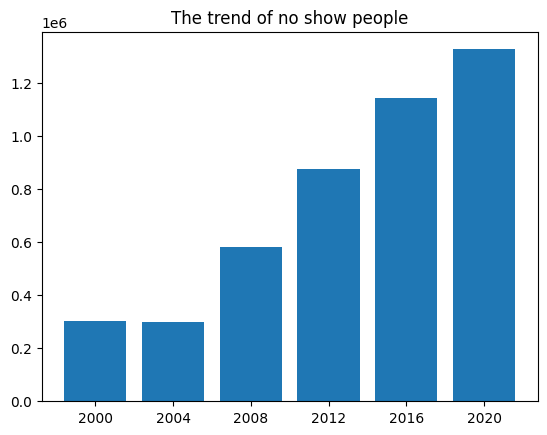

In [14]:
plt.bar([i.split("-")[0] for i in voted["date"]], voted["noshow_count"])
plt.title("The trend of no show people")
plt.show()

In [15]:
df_copy = df.copy()
df_copy["vote_start"] = pd.to_datetime(df_copy["Voters_CalculatedRegDate"])

In [16]:
df_copy["Voters_CalculatedRegDate"].isna().sum()

np.int64(0)

In [17]:
df_copy["vote_start"].isnull().sum()

np.int64(0)

In [18]:
df_copy["vote_start"].describe()

count                          7760253
mean     2006-05-13 13:31:25.792485760
min                1945-10-08 00:00:00
25%                2000-02-06 00:00:00
50%                2006-09-22 00:00:00
75%                2016-11-07 00:00:00
max                2024-10-04 00:00:00
Name: vote_start, dtype: object

In [19]:
from datetime import datetime

# Reference date as datetime
reference_date = datetime(2020, 11, 3)

# Calculate 'vote_life' as the difference in days
df_copy["vote_life"] = (reference_date - df_copy["vote_start"]).dt.days
df["vote_life"] = (reference_date - df_copy["vote_start"]).dt.days

In [20]:
# Plot the density of 'vote_life'
# plt.figure(figsize=(8, 6))
# df["vote_life"].plot(kind='kde', title='Density Plot of Vote Life')
# plt.xlabel("Vote Life (Days)")
# plt.ylabel("Density")
# plt.grid(True)
# plt.show()

In [21]:
# those 
df_before_2020 = df[df["vote_life"] >= 0]

In [22]:
print(len(df_before_2020) / len(df))

0.8741823236948589


In [23]:
print(len(df_before_2020))

print(voted["count"][-1])

6783876
5458256


In [24]:
# df_before_2020.to_csv("../data/oh_merged_till_2020.csv")

In [25]:
df_before_2020["voted_2020"] = df_before_2020["General_2020_11_03"] == "Y"

/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_9884/1239352097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2020["voted_2020"] = df_before_2020["General_2020_11_03"] == "Y"


In [26]:
df_before_2020["voted_2020"].value_counts()

voted_2020
True     5458256
False    1325620
Name: count, dtype: int64

In [27]:
for i in df_before_2020.columns:
    print(i, df_before_2020[i].isnull().sum())

Unnamed: 0 0
LALVOTERID 0
Residence_Addresses_CensusBlock 123704
Residence_Families_FamilyID 0
Residence_Addresses_Property_Land_Square_Footage 785256
Residence_Addresses_Property_Type 157870
Mailing_Addresses_State 0
Mailing_Addresses_Zip 88
Voters_Gender 132841
Voters_Age 1996
Voters_BirthDate 1996
ConsumerData_Education_of_Person 2041095
EthnicGroups_EthnicGroup1Desc 829943
ConsumerData_Inferred_HH_Rank 165
ConsumerData_Language_Code 1025038
ConsumerData_Marital_Status 1355473
ConsumerData_Single_Parent 6327392
ConsumerDataLL_Veteran 6484914
ConsumerData_African_American_Professional 6746877
ConsumerData_Business_Owner 6411914
ConsumerData_Occupation_Group 1083191
ConsumerData_Occupation_of_Person 4991338
ConsumerData_LikelyRecentEmployment_Executive_Level 6569735
ConsumerData_LikelyRecentEmployment_Executive_Department 6569735
Voters_PlaceOfBirth 6783876
Voters_Active 0
Voters_CalculatedRegDate 0
Voters_OfficialRegDate 49438
Parties_Description 0
VoterParties_Change_Changed_Party 6

In [28]:
# I want the predictors to be 
# Residence_Addresses_Property_Type
# Voters_Gender
# Voters_Age
# ConsumerData_Education_of_Person
# EthnicGroups_EthnicGroup1Desc
# ConsumerData_Marital_Status
# ConsumerDataLL_Veteran
# ConsumerData_LikelyRecentEmployment_Executive_Level
# ConsumerData_Religion_Code
# ConsumerData_Number_Of_Persons_in_HH
# ConsumerData_Generations_In_HH
# ConsumerData_Presence_Of_Children_in_HH
# ConsumerData_Senior_Adult_In_HH
# ConsumerData_Veteran_In_HH
# FECDonors_NumberOfDonations
# ConsumerData_Estimated_Income_Amount
# ConsumerData_Credit_Rating

data = df_before_2020.copy()

In [30]:

from pandas.api.types import is_object_dtype
worthy_cols = [
    "Voters_Gender",\
    "Voters_Age",\
    "ConsumerData_Education_of_Person",\
    "EthnicGroups_EthnicGroup1Desc",\
    "ConsumerData_Marital_Status",\
    "ConsumerDataLL_Veteran",\
    "ConsumerData_LikelyRecentEmployment_Executive_Level",\
    "ConsumerData_Religion_Code",\
    "ConsumerData_Number_Of_Persons_in_HH",\
    "ConsumerData_Generations_In_HH",\
    "ConsumerData_Presence_Of_Children_in_HH",\
    "ConsumerData_Senior_Adult_In_HH",\
    "ConsumerData_Veteran_In_HH",\
    "FECDonors_NumberOfDonations",\
    "ConsumerData_Estimated_Income_Amount",\
    "ConsumerData_Credit_Rating",\
]

for col in worthy_cols:
    print("-------")
    print(col)
    # if is_object_dtype(data[col]):
    #     print(data[col].value_counts())
    #     print("Nan :", data[col].isnull().sum())
    # else:
    print(data[col].describe())

-------
Voters_Gender
count     6651035
unique          2
top             F
freq      3513168
Name: Voters_Gender, dtype: object
-------
Voters_Age
count    6.781880e+06
mean     5.283092e+01
std      1.778041e+01
min      2.000000e+01
25%      3.800000e+01
50%      5.300000e+01
75%      6.700000e+01
max      1.000000e+02
Name: Voters_Age, dtype: float64
-------
ConsumerData_Education_of_Person
count                      4742781
unique                           6
top       Completed College Likely
freq                       2257742
Name: ConsumerData_Education_of_Person, dtype: object
-------
EthnicGroups_EthnicGroup1Desc
count      5953933
unique           5
top       European
freq       4957325
Name: EthnicGroups_EthnicGroup1Desc, dtype: object
-------
ConsumerData_Marital_Status
count     5428403
unique          4
top       Married
freq      2644420
Name: ConsumerData_Marital_Status, dtype: object
-------
ConsumerDataLL_Veteran
count     298962
unique         1
top          Yes
freq

In [31]:
worthy_cols = [
    "Voters_Gender",\
    "Voters_Age",\
    "ConsumerData_Education_of_Person",\
    "EthnicGroups_EthnicGroup1Desc",\
    "ConsumerData_Marital_Status",\
    "ConsumerDataLL_Veteran",\
    "ConsumerData_LikelyRecentEmployment_Executive_Level",\
    "ConsumerData_Religion_Code",\
    "ConsumerData_Number_Of_Persons_in_HH",\
    "ConsumerData_Generations_In_HH",\
    "ConsumerData_Presence_Of_Children_in_HH",\
    "ConsumerData_Senior_Adult_In_HH",\
    "ConsumerData_Veteran_In_HH",\
    "FECDonors_NumberOfDonations",\
    "ConsumerData_Estimated_Income_Amount",\
    "ConsumerData_Credit_Rating",\
]

In [32]:
data["ConsumerData_Education_of_Person"].isnull().sum()

np.int64(2041095)

In [ ]:
def fill_in_unknwon(df, df_original, col, prefix):
    df[col] = df_original[col].fillna("Unknown")
    encoded = pd.get_dummies(df[col], prefix=prefix)
    df = pd.concat([data, encoded], axis = 1)
    df.drop(columns=[col], inplace=True)

In [ ]:
# Preprocess Unknown Categories
# 1. Preprocess Voters Gender
fill_in_unknwon(data, df_before_2020, "Voters_Gender", "Gender")
fill_in_unknwon(data, df_before_2020, "ConsumerData_Education_of_Person", "Education")
fill_in_unknwon(data, df_before_2020, "EthnicGroups_EthnicGroup1Desc", "Ethnic")
fill_in_unknwon(data, df_before_2020, "ConsumerDatab_Marital_Status", "Marry")

In [43]:
data["Residence_Addresses_Property_Type"].isnull().sum()

np.int64(157870)

In [42]:
data["Residence_Addresses_Property_Type"].value_counts()

Residence_Addresses_Property_Type
Residential         5226813
Apartment            837113
Duplex               181510
Condominium          159996
Triplex              135060
Mobil Home            66534
Commercial/Other      18940
Agricultural             40
Name: count, dtype: int64

In [38]:
# Preprocess the data for inputting into model
data = df_before_2020.copy()
data['Voters_Gender'] = data['Voters_Gender'].fillna('Unknown')

In [ ]:
y = df_before_2020["voted_2020"]

qual_X = ["Parties_Description", ""]
quan_X = ["ConsumerData_Number_Of_Adults_in_HH", \
            "ConsumerData_Number_Of_Persons_in_HH",\
            "ConsumerData_Generations_In_HH",\
            "Residence_Families_HHVotersCount"]
ord_X = [""]

X = []




In [ ]:
# ((df["Presidential_Primary_2020_03_17"] != "Y") & (df["Presidential_Primary_2024_03_19"] == "Y")).sum()

np.int64(830343)

In [ ]:
# ((df["Presidential_Primary_2020_03_17"] != "Y") & (df["Presidential_Primary_2024_03_19"] == "Y")).sum() / total_rows

np.float64(0.1069994754037014)

In [34]:
# Total who voted on 2020
# print("Year 2020: ",(df["Presidential_Primary_2020_03_17"] == "Y").sum() / total_rows)
# print("Year 2024: ",(df["Presidential_Primary_2024_03_19"] == "Y").sum() / total_rows)

In [35]:
# df["Presidential_Primary_2024_03_19"] != "Y"

In [36]:
# (df["Presidential_Primary_2024_03_19"] == "Y").sum() / total_rows

In [ ]:
# df_change = df[df["Presidential_Primary_2020_03_17"] == "Y"]